<h1 style="font-size:2em;color:#2467C0">Exploration of Data</h1>

In [76]:
#The variables are:
#• HHID – household identifier
#• TIME – number of pasta orders by household
#• Pastaprice – price of a pasta order
#• Voucher – if a 10% voucher was used for the order
#• Customer age – age of household head
#• Year income – yearly household net income
#• Area code – region code where the household resides

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('.\pastadelivery_casestudy.csv',sep=';')

In [5]:
data.head()

,HHID,TIME,Pastaprice,Voucher,Customer age,Year income,Area Code
0,962,1,"3,71",0,29,141067,5
1,962,2,"1,64",0,29,141067,5
2,962,3,"1,33",1,29,141067,5
3,962,4,"0,43",1,29,141067,5
4,962,5,"1,95",1,29,141067,5


In [30]:
data.shape

(40000, 7)

### How many UNIQUE Householder Id's are there ?

In [11]:
unique_hhid=pd.unique(data['HHID'])

In [67]:
len(unique_hhid)

2000

### How many are area codes ?

In [69]:
unique_area=pd.unique(data['Area Code'])

In [71]:
len(unique_area)

5

### Sorting customer ages in ascending order 

In [79]:
sort_age=data.sort_values(by='Customer age',axis=0,ascending=True)

In [80]:
sort_age.head()

,HHID,TIME,Pastaprice,Voucher,Customer age,Year income,Area Code
3518,1075,19,"0,88",1,18,50076,4
22339,1713,20,"2,64",0,18,22350,2
25482,653,3,"1,88",0,18,19183,5
25483,653,4,"1,58",0,18,19183,5
25484,653,5,"2,73",1,18,19183,5


### Calculation of Year Income's mean, standard deviation, min-max value and so on... 

In [34]:
data['Year income'].describe()

count     40000.000000
mean      27096.131500
std       15928.176905
min         609.000000
25%       15380.000000
50%       24487.500000
75%       35272.500000
max      141067.000000
Name: Year income, dtype: float64

### How Many voucher were introduced to customers (by *10%)

In [9]:
voucher_counts=data['Voucher'].value_counts()

In [10]:
voucher_counts

0    24187
1    12293
2     2960
3      493
4       63
5        4
Name: Voucher, dtype: int64

### Order times by house holders

In [35]:
time_count=data[['TIME','HHID']].groupby('TIME').count()

In [77]:
time_count.head()

,HHID
TIME,
1,2000
2,2000
3,2000
4,2000
5,2000


### Youngest and oldest customer ages

In [78]:
print('The youngest customer age is:', data['Customer age'].min(),'The oldest customer age is:',data['Customer age'].max())

The youngest customer age is: 18 The oldest customer age is: 65


### Grouping by age

In [49]:
data.groupby('Customer age').head(1)

,HHID,TIME,Pastaprice,Voucher,Customer age,Year income,Area Code
0,962,1,"3,71",0,29,141067,5
20,940,1,"2,00",1,23,112984,4
40,1722,1,"1,71",1,47,111296,3
60,1204,1,"0,00",0,63,107938,5
80,180,1,"2,25",0,52,106319,2
100,1500,1,"3,77",3,38,93529,3
120,623,1,"1,68",0,45,93481,4
140,781,1,"2,78",0,30,91997,5
160,1044,1,"3,07",0,56,85241,1
180,1093,1,"0,27",0,19,84658,2


### Is any row null?

In [51]:
data.isnull().any()

HHID            False
TIME            False
Pastaprice      False
Voucher         False
Customer age    False
Year income     False
Area Code       False
dtype: bool

That's nice! No null values!

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000992FA930F0>]],
      dtype=object)

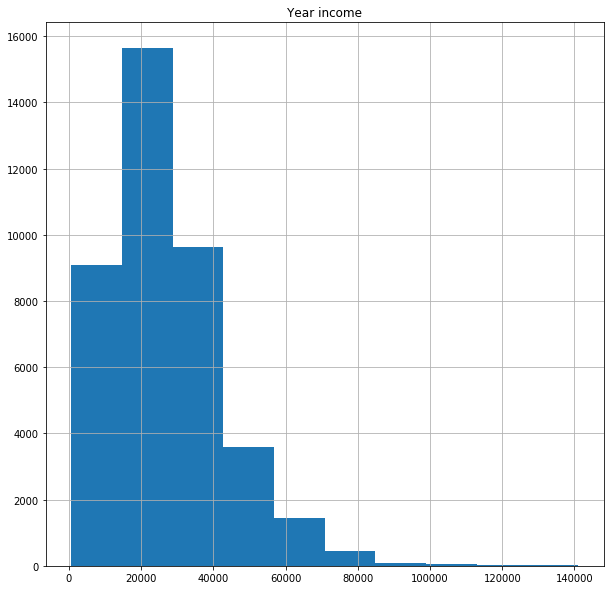

In [84]:
data.hist(column='Year income', figsize=(10,10))

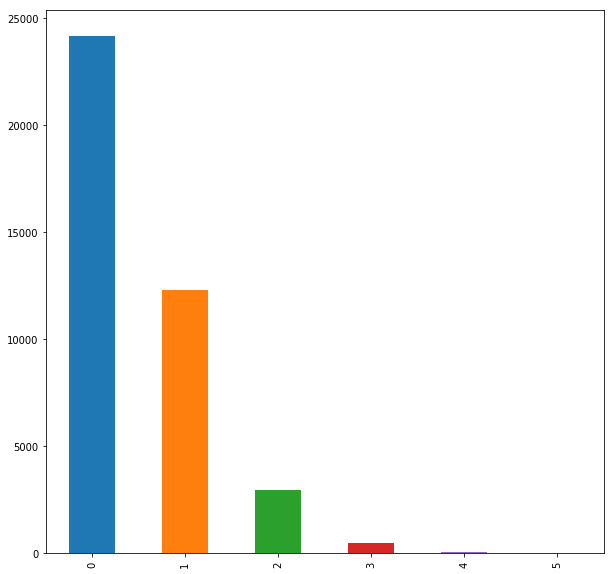

In [83]:
voucher_counts.plot(kind='bar', figsize=(10,10))

### Filters for selecting rows

In [8]:
is_highly_income = data['Year income'] >= 100000

In [9]:
data[is_highly_income][:10]

,HHID,TIME,Pastaprice,Voucher,Customer age,Year income,Area Code
0,962,1,"3,71",0,29,141067,5
1,962,2,"1,64",0,29,141067,5
2,962,3,"1,33",1,29,141067,5
3,962,4,"0,43",1,29,141067,5
4,962,5,"1,95",1,29,141067,5
5,962,6,"2,76",1,29,141067,5
6,962,7,"3,23",1,29,141067,5
7,962,8,"0,82",0,29,141067,5
8,962,9,"2,78",1,29,141067,5
9,962,10,"1,89",1,29,141067,5
